<a href="https://colab.research.google.com/github/kevin-r-murphy/BA888-MBTA/blob/main/MBTA_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install requests
import requests

In [74]:
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import urllib.request
import zipfile
from zipfile import ZipFile
import os, os.path
url = 'https://cdn.mbta.com/MBTA_GTFS.zip'
response = requests.get(url)
#Download and unzip GTFS data
with open('MBTA_GTFS.zip', 'wb') as f:
    f.write(response.content)

with ZipFile('MBTA_GTFS.zip', 'r') as f:
    f.extractall()
#Download and unzip Headway data
url2 = 'https://www.arcgis.com/sharing/rest/content/items/ccb2941254944803bbd4e2df58e09906/data'
response2 = requests.get(url2)

with open('headway.zip', 'wb') as f:
    f.write(response2.content)

with ZipFile('headway.zip', 'r') as f:
    f.extractall()
#Download and Unzip Gated Entry data
url3 = 'https://www.arcgis.com/sharing/rest/content/items/7859894afb5641ce91a2bb03599fdf5b/data'
response3 = requests.get(url3)

with open('gated_entry.zip', 'wb') as f:
    f.write(response3.content)

with ZipFile('gated_entry.zip', 'r') as f:
    f.extractall()

In [140]:
path = '/content/Headways_2024'
num_files = len([f for f in os.listdir(path)
                if os.path.isfile(os.path.join(path, f))])
headways = pd.read_csv('/content/Headways_2024/2024-01_Headway.csv')
for i in range(2, num_files+1):
  headway_temp = pd.read_csv('/content/Headways_2024/2024-0' + str(i) + '_Headway.csv')
  headways = pd.concat([headways, headway_temp], ignore_index=True)
trips = pd.read_csv('/content/trips.txt', dtype = {'trip_id': 'string'})
shapes = pd.read_csv('/content/shapes.txt', dtype = {'shape_id': 'string'})
stop_times = pd.read_csv('/content/stop_times.txt', dtype = {'trip_id': 'string', 'stop_id': 'string'})
stops = pd.read_csv('/content/stops.txt')
route_patterns = pd.read_csv('/content/route_patterns.txt')
route = pd.read_csv('/content/routes.txt')
gated_entries = pd.read_csv('/content/GSE_by_year/GSE_2024.csv')

<ipython-input-140-708f9eaaa154>:4: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-140-708f9eaaa154>:6: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-140-708f9eaaa154>:6: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-140-708f9eaaa154>:6: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-140-708f9eaaa154>:6: DtypeWarning:

Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-140-708f9eaaa154>:10: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [141]:
#Needs High Ram, Takes 4 mins
feeds = pd.read_csv('https://cdn.mbta.com/archive/archived_feeds.txt')
from zipfile import ZipFile
from io import BytesIO

feeds = feeds[feeds['feed_start_date'] >= 20240101]
for i in range(0, len(feeds)):
  url = feeds.iloc[i]['archive_url']
  response = requests.get(url)

  with ZipFile(BytesIO(response.content)) as zfile:
    for filename in zfile.namelist():
      if filename in ['trips.txt', 'shapes.txt', 'stop_times.txt']:  # Process only needed
        with zfile.open(filename) as file:
          df = pd.read_csv(file, dtype = {'trip_id': 'string', 'shape_id': 'string', 'stop_id': 'string'})
          if filename == 'trips.txt':
            trips = pd.concat([trips,df]).drop_duplicates(subset = ['trip_id'])
          if filename == 'shapes.txt':
            shapes = pd.concat([shapes,df]).drop_duplicates(subset = ['shape_id'])
          if filename == 'stop_times.txt':
            stop_times = pd.concat([stop_times,df]).drop_duplicates(subset = ['trip_id', 'stop_id'])


<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae00a9d>:15: DtypeWarning:

Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-141-fb521ae0

In [77]:
gated_entries.head()

,service_date,time_period,stop_id,station_name,route_or_line,gated_entries
0,2024-05-31,(00:00:00),place-alfcl,Alewife,Red Line,3.0
1,2024-05-31,(00:00:00),place-andrw,Andrew,Red Line,9.0
2,2024-05-31,(00:00:00),place-aport,Airport,Blue Line,56.0
3,2024-05-31,(00:00:00),place-aqucl,Aquarium,Blue Line,92.0
4,2024-05-31,(00:00:00),place-armnl,Arlington,Green Line,41.0


In [78]:
headways['route_id'].value_counts()

route_id
Green-E     839804
Green-D     726645
Green-B     645526
Orange      631347
Red         559307
Green-C     552099
Blue        404348
Mattapan    224403
Name: count, dtype: int64

In [79]:
print(trips.shape)
print(shapes.shape)
print(stop_times.shape)
print(stops.shape)
print(route_patterns.shape)
print(route.shape)

(278794, 12)
(2429, 5)
(7768882, 12)
(9969, 19)
(1095, 9)
(379, 14)


In [80]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed
0,1,BUS32024-hba34ns1-Weekday-02,63075073,Harvard,NaN,0,A747-392,010128,1,NaN,1-_-0,1
1,1,BUS32024-hba34ns1-Weekday-02,63075078,Harvard,NaN,0,A01-1,010128,1,NaN,1-_-0,1
2,1,BUS32024-hba34ns1-Weekday-02,63075083,Harvard,NaN,0,A747-392,010128,1,NaN,1-_-0,1
3,1,BUS32024-hba34ns1-Weekday-02,63075084,Harvard,NaN,0,A01-6,010128,1,NaN,1-_-0,1
4,1,BUS32024-hba34ns1-Weekday-02,63075086,Harvard,NaN,0,A01-2,010128,1,NaN,1-_-0,1


In [81]:
trips['trip_route_type'].value_counts()

trip_route_type
3.0    56721
Name: count, dtype: int64

In [82]:
shapes.head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,010128,42.329848,-71.083876,10001,NaN
185,010129,42.373040,-71.117686,10001,NaN
375,040070,42.366085,-71.060044,10001,NaN
499,040072,42.364695,-71.062265,10001,NaN
637,040073,42.344657,-71.034477,10001,NaN


In [83]:
stop_times[stop_times['trip_id'] == 59428098] #Can't Convert arrival and departure into date time because hours are greater than 23

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,continuous_pickup,continuous_drop_off
16,59428098,25:05:00,25:05:00,70261,1,NaN,0,1,0.0,asmnl,NaN,NaN
17,59428098,25:06:00,25:06:00,70263,2,NaN,0,0,0.0,cedgr,NaN,NaN
18,59428098,25:08:00,25:08:00,70265,3,NaN,0,0,0.0,butlr,NaN,NaN
19,59428098,25:09:00,25:09:00,70267,4,NaN,0,0,0.0,miltt,NaN,NaN
20,59428098,25:10:00,25:10:00,70269,5,NaN,0,0,0.0,cenav,NaN,NaN
21,59428098,25:11:00,25:11:00,70271,6,NaN,0,0,0.0,valrd,NaN,NaN
22,59428098,25:12:00,25:12:00,70273,7,NaN,0,0,0.0,capst,NaN,NaN
23,59428098,25:13:00,25:13:00,70275,8,NaN,1,0,0.0,matt,NaN,NaN


In [142]:
stop_times['stop_id'] = stop_times['stop_id'].astype(str)
stops['stop_id'] = stops['stop_id'].astype(str)
stop_times = stop_times.merge(stops, how = 'left', on = 'stop_id')

In [143]:
trips['route_id'] = trips['route_id'].astype(str)
trips['trip_id'] = trips['trip_id'].astype(str)
stop_times['trip_id'] = stop_times['trip_id'].astype(str)
trips = trips.merge(route[['route_id','route_desc', 'route_type']], how = 'left', on = 'route_id')

In [144]:
stop_times = stop_times.merge(trips[['trip_id','route_desc', 'route_type', 'route_id']], how = 'left', on = 'trip_id')

In [87]:
stop_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7768882 entries, 0 to 7768881
Data columns (total 33 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              object 
 1   arrival_time         object 
 2   departure_time       object 
 3   stop_id              object 
 4   stop_sequence        int64  
 5   stop_headsign        object 
 6   pickup_type          int64  
 7   drop_off_type        int64  
 8   timepoint            float64
 9   checkpoint_id        object 
 10  continuous_pickup    float64
 11  continuous_drop_off  float64
 12  stop_code            object 
 13  stop_name            object 
 14  stop_desc            object 
 15  platform_code        object 
 16  platform_name        object 
 17  stop_lat             float64
 18  stop_lon             float64
 19  zone_id              object 
 20  stop_address         object 
 21  stop_url             object 
 22  level_id             object 
 23  location_type        float64
 24

In [88]:
stop_times[stop_times['arrival_time'] != stop_times['departure_time']]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id
213849,62890194,24:53:00,25:02:00,70197,70,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-C
214818,62890235,24:40:00,24:50:00,70199,80,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-E
216972,62890321,24:52:00,25:02:00,70200,600,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-E
219089,62890406,25:06:00,25:13:00,70198,60,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-D
219726,62890431,24:56:00,25:03:00,70200,600,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536170,59724295,24:50:00,25:06:00,70021,100,NaN,0,0,1.0,dwnxg,...,0.0,place-dwnxg,1.0,Boston,NaN,NaN,1.0,Rapid Transit,1.0,Orange
7537977,59737560,24:53:00,25:05:00,70040,10,NaN,0,0,1.0,gover,...,0.0,place-gover,1.0,Boston,NaN,NaN,1.0,Rapid Transit,1.0,Blue
7537978,59737560,25:07:00,25:10:00,70042,20,NaN,0,0,1.0,state,...,0.0,place-state,1.0,Boston,NaN,NaN,1.0,Rapid Transit,1.0,Blue
7638574,60393746,24:56:00,25:01:00,70076,150,NaN,0,0,1.0,pktrm,...,0.0,place-pktrm,1.0,Boston,NaN,NaN,1.0,Rapid Transit,1.0,Red


In [89]:
trips[trips['trip_id'] == '60128454']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type


In [90]:
trips[trips['trip_id'] == '59428098']

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
194296,Mattapan,LRV12024-hlm14016-Saturday-01,59428098,Mattapan,NaN,0,M899_-2,899_0005,1,NaN,Mattapan-_-0,2,Rapid Transit,0.0


In [91]:
trips.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,trip_route_type,route_pattern_id,bikes_allowed,route_desc,route_type
0,1,BUS32024-hba34ns1-Weekday-02,63075073,Harvard,NaN,0,A747-392,010128,1,NaN,1-_-0,1,Key Bus,3.0
1,1,BUS32024-hba34ns1-Weekday-02,63075078,Harvard,NaN,0,A01-1,010128,1,NaN,1-_-0,1,Key Bus,3.0
2,1,BUS32024-hba34ns1-Weekday-02,63075083,Harvard,NaN,0,A747-392,010128,1,NaN,1-_-0,1,Key Bus,3.0
3,1,BUS32024-hba34ns1-Weekday-02,63075084,Harvard,NaN,0,A01-6,010128,1,NaN,1-_-0,1,Key Bus,3.0
4,1,BUS32024-hba34ns1-Weekday-02,63075086,Harvard,NaN,0,A01-2,010128,1,NaN,1-_-0,1,Key Bus,3.0


In [92]:
stops.head()

,stop_id,stop_code,stop_name,stop_desc,platform_code,platform_name,stop_lat,stop_lon,zone_id,stop_address,stop_url,level_id,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type
0,1,1,Washington St opp Ruggles St,NaN,NaN,NaN,42.330957,-71.082754,ExpressBus-Downtown,NaN,https://www.mbta.com/stops/1,NaN,0,NaN,1,Boston,Washington Street,Ruggles Street,3.0
1,10,10,Theo Glynn Way @ Newmarket Sq,NaN,NaN,NaN,42.330555,-71.068787,LocalBus,NaN,https://www.mbta.com/stops/10,NaN,0,NaN,1,Boston,Theodore Glynn Way,Newmarket Square,3.0
2,10000,10000,Tremont St opp Temple Pl,NaN,NaN,NaN,42.355692,-71.062911,LocalBus,NaN,https://www.mbta.com/stops/10000,NaN,0,NaN,1,Boston,Tremont Street,Temple Place,3.0
3,10003,10003,Albany St opp Randall St,NaN,NaN,NaN,42.331591,-71.076237,LocalBus,NaN,https://www.mbta.com/stops/10003,NaN,0,NaN,1,Boston,Albany Street,Randall Street,3.0
4,10005,10005,Albany St opp E Concord St,NaN,NaN,NaN,42.335017,-71.071280,LocalBus,NaN,https://www.mbta.com/stops/10005,NaN,0,NaN,1,Boston,Albany Street,NaN,3.0


In [93]:
route_patterns.head()

,route_pattern_id,route_id,direction_id,route_pattern_name,route_pattern_time_desc,route_pattern_typicality,route_pattern_sort_order,representative_trip_id,canonical_route_pattern
0,Red-3-0,Red,0,Alewife - Braintree,NaN,1,100100000,canonical-Red-C1-0,1
1,Red-1-0,Red,0,Alewife - Ashmont,NaN,1,100100001,canonical-Red-C2-0,1
2,Red-F-0,Red,0,Kendall/MIT - Braintree,Weekdays only,3,100100120,63814043,2
3,Red-G-0,Red,0,Kendall/MIT - Ashmont,Weekdays only,3,100100130,63813880,2
4,Red-H-0,Red,0,Park Street - Braintree,NaN,3,100100140,63814095,2


In [94]:
route.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,route_fare_class,line_id,listed_route,network_id
0,Red,1,NaN,Red Line,Rapid Transit,1,https://www.mbta.com/schedules/Red,DA291C,FFFFFF,10010,Rapid Transit,line-Red,NaN,rapid_transit
1,Mattapan,1,NaN,Mattapan Trolley,Rapid Transit,0,https://www.mbta.com/schedules/Mattapan,DA291C,FFFFFF,10011,Rapid Transit,line-Mattapan,NaN,m_rapid_transit
2,Orange,1,NaN,Orange Line,Rapid Transit,1,https://www.mbta.com/schedules/Orange,ED8B00,FFFFFF,10020,Rapid Transit,line-Orange,NaN,rapid_transit
3,Green-B,1,B,Green Line B,Rapid Transit,0,https://www.mbta.com/schedules/Green-B,00843D,FFFFFF,10032,Rapid Transit,line-Green,NaN,rapid_transit
4,Green-C,1,C,Green Line C,Rapid Transit,0,https://www.mbta.com/schedules/Green-C,00843D,FFFFFF,10033,Rapid Transit,line-Green,NaN,rapid_transit


In [95]:
trips['route_id'].value_counts()

route_id
Red                                11568
Green-D                            10598
Shuttle-NorthStationWellington      9112
Green-B                             7822
Orange                              7372
                                   ...  
Shuttle-BallardvaleNorthStation        1
Shuttle-ManchesterGloucester           1
Shuttle-HaverhillMaldenCenter          1
Shuttle-HaverhillNorthStation          1
Shuttle-ManchesterRockport             1
Name: count, Length: 363, dtype: int64

**EDA Charts**

Text(0, 0.5, 'Route Name')

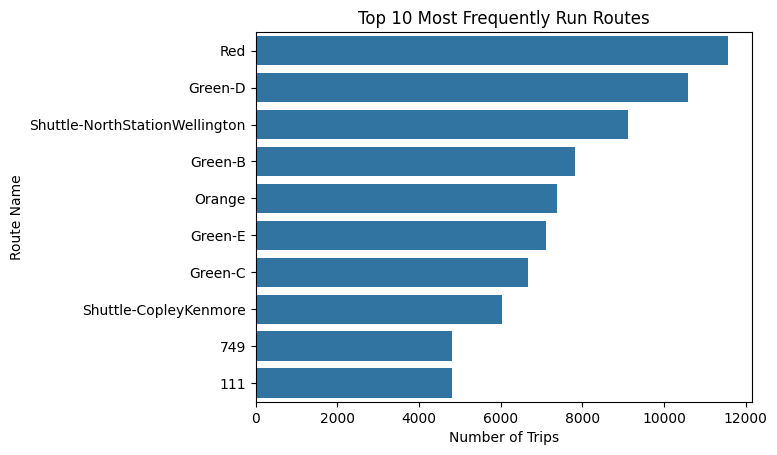

In [96]:
sns.barplot(trips['route_id'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Top 10 Most Frequently Run Routes')
plt.xlabel('Number of Trips')
plt.ylabel('Route Name')

Text(0, 0.5, 'Stop Name')

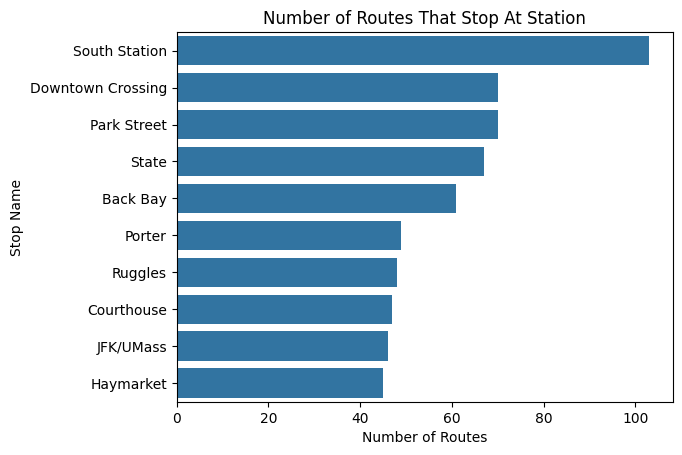

In [97]:
sns.barplot(stops['stop_name'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Number of Routes That Stop At Station')
plt.xlabel('Number of Routes')
plt.ylabel('Stop Name')

Text(0, 0.5, 'Stop Name')

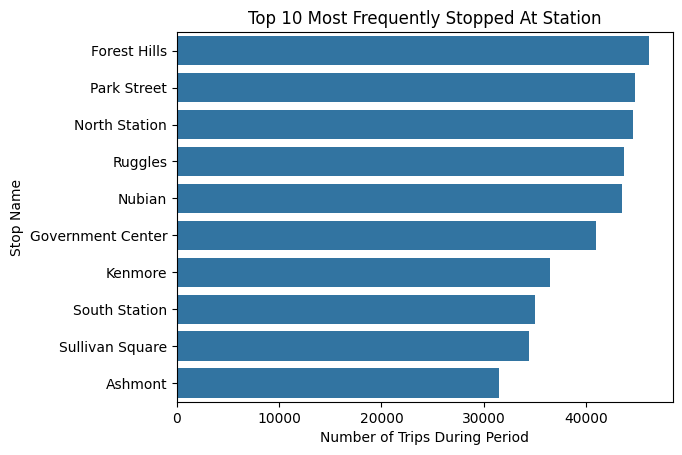

In [98]:
sns.barplot(stop_times['stop_name'].value_counts().sort_values(ascending=False).head(10), orient = 'h')
plt.title('Top 10 Most Frequently Stopped At Station')
plt.xlabel('Number of Trips During Period')
plt.ylabel('Stop Name')

Text(0.5, 0, 'Number of Trips')

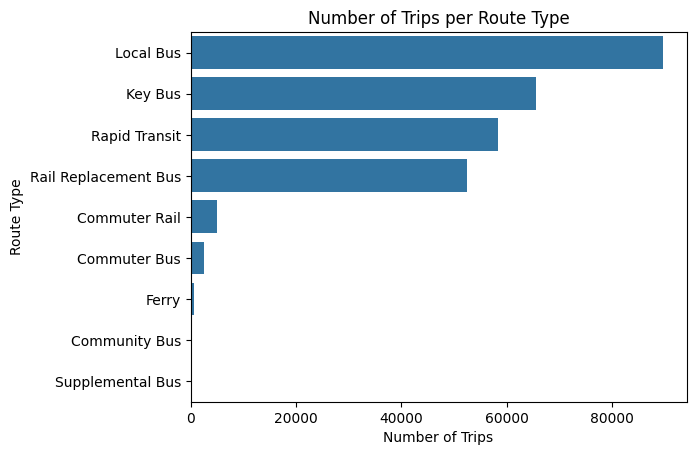

In [99]:
sns.barplot(trips['route_desc'].value_counts().sort_values(ascending=False), orient = 'h')
plt.title('Number of Trips per Route Type')
plt.ylabel('Route Type')
plt.xlabel('Number of Trips')

Text(0.5, 0, 'Number of Stops')

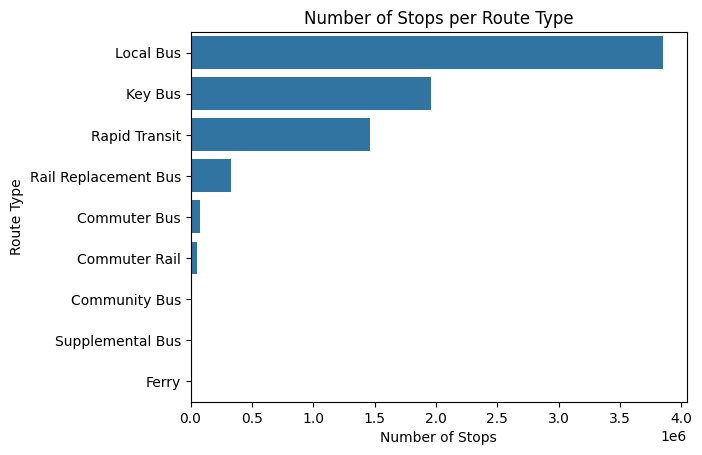

In [100]:
sns.barplot(stop_times['route_desc'].value_counts(), orient = 'h')
plt.title('Number of Stops per Route Type')
plt.ylabel('Route Type')
plt.xlabel('Number of Stops')

Text(0.5, 0, 'Longitude')

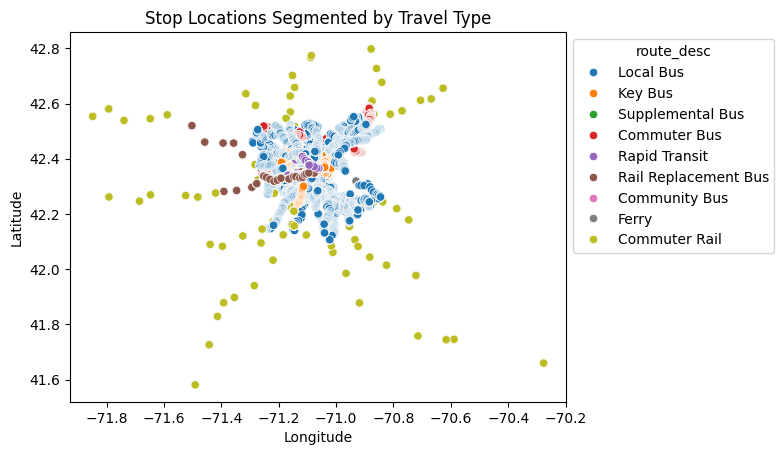

In [101]:
ax = sns.scatterplot(data = stop_times, y = 'stop_lat', x = 'stop_lon', hue = 'route_desc')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('Stop Locations Segmented by Travel Type')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

Text(0.5, 0, 'Longitude')

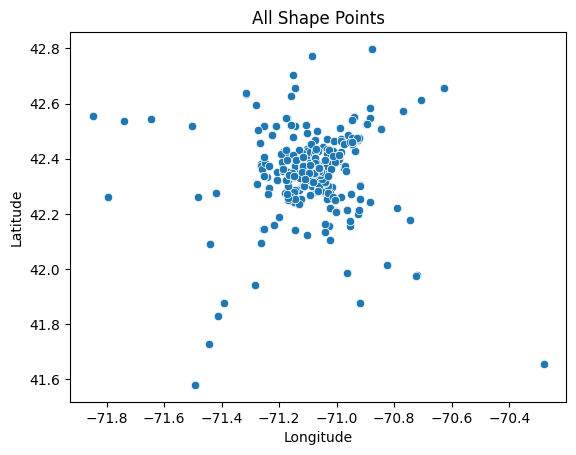

In [102]:
sns.scatterplot(data = shapes, y = 'shape_pt_lat', x = 'shape_pt_lon')
plt.title('All Shape Points')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

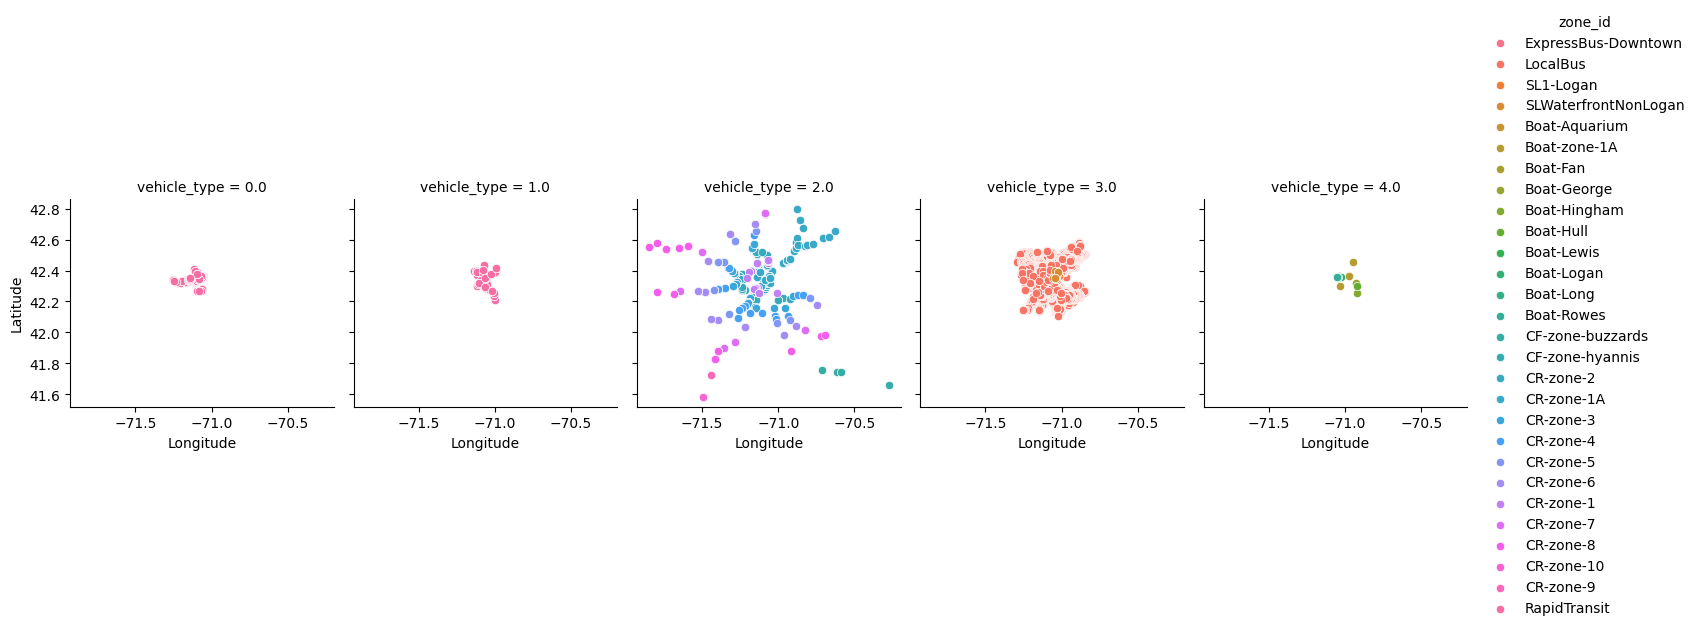

In [103]:
g = sns.FacetGrid(data = stops, col = 'vehicle_type', hue = 'zone_id')
g.map(sns.scatterplot, 'stop_lon', 'stop_lat')
g.add_legend()
#g.set_titles('All Stop Locations Segmented by Zone')
g.set_ylabels('Latitude')
g.set_xlabels('Longitude')

Text(0.5, 0, 'Longitude')

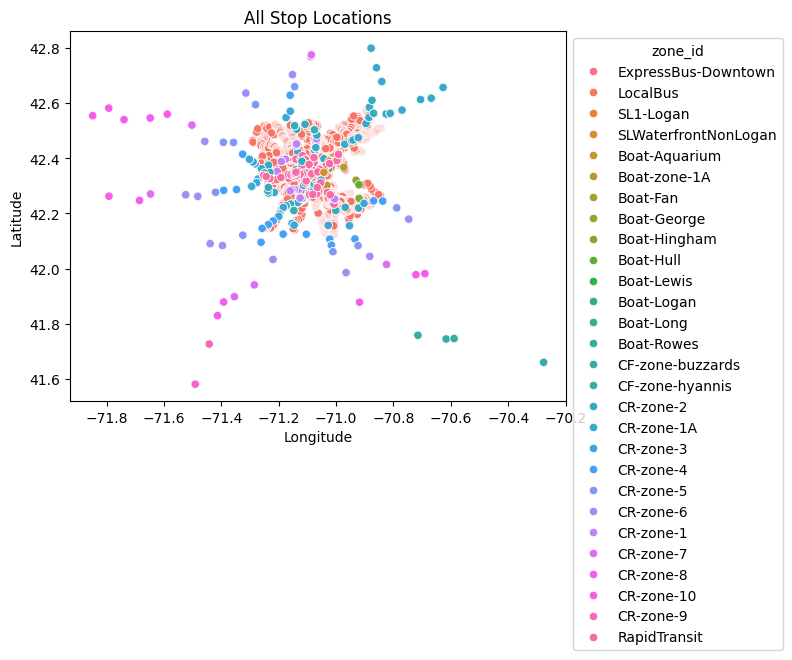

In [104]:
ax = sns.scatterplot(data = stops, x = 'stop_lon', y = 'stop_lat', hue = 'zone_id')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title('All Stop Locations')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

**Gate Entries & Headways**

In [105]:
headways.head()

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds
0,2024-01-01,Green-B,Green,Green-B,60564050,1,East,place-babck,170136,Babcock Street,2024-01-01T05:41:57Z,20517,NaN,NaN
1,2024-01-01,Green-B,Green,Green-B,ADDED-1581739663,1,East,place-babck,170136,Babcock Street,2024-01-01T05:53:27Z,21207,690.0,690.0
2,2024-01-01,Green-B,Green,Green-B,ADDED-1581739665,1,East,place-babck,170136,Babcock Street,2024-01-01T06:03:21Z,21801,594.0,594.0
3,2024-01-01,Green-B,Green,Green-B,ADDED-1581739671,1,East,place-babck,170136,Babcock Street,2024-01-01T06:08:32Z,22112,311.0,311.0
4,2024-01-01,Green-B,Green,Green-B,60564070,1,East,place-babck,170136,Babcock Street,2024-01-01T06:24:06Z,23046,934.0,934.0


****Headway Analysis****

In [149]:
headways['stop_id'] = headways['stop_id'].astype(str)
headways['trip_id'] = headways['trip_id'].astype(str)
stop_times['trip_id'] = stop_times['trip_id'].astype(str)
stop_times['stop_id'] = stop_times['stop_id'].astype(str)

In [107]:
headways

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds
0,2024-01-01,Green-B,Green,Green-B,60564050,1,East,place-babck,170136,Babcock Street,2024-01-01T05:41:57Z,20517,NaN,NaN
1,2024-01-01,Green-B,Green,Green-B,ADDED-1581739663,1,East,place-babck,170136,Babcock Street,2024-01-01T05:53:27Z,21207,690.0,690.0
2,2024-01-01,Green-B,Green,Green-B,ADDED-1581739665,1,East,place-babck,170136,Babcock Street,2024-01-01T06:03:21Z,21801,594.0,594.0
3,2024-01-01,Green-B,Green,Green-B,ADDED-1581739671,1,East,place-babck,170136,Babcock Street,2024-01-01T06:08:32Z,22112,311.0,311.0
4,2024-01-01,Green-B,Green,Green-B,60564070,1,East,place-babck,170136,Babcock Street,2024-01-01T06:24:06Z,23046,934.0,934.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4583474,2024-05-31,Green-B,Green,Green-B,ADDED-1581926500,0,West,place-kencl,71151,Kenmore,2024-06-01T00:50:03Z,89403,276.0,806.0
4583475,2024-05-31,Green-B,Green,Green-B,ADDED-1581926556,0,West,place-kencl,71151,Kenmore,2024-06-01T00:53:25Z,89605,106.0,202.0
4583476,2024-05-31,Green-B,Green,Green-B,ADDED-1581926462,0,West,place-kencl,71151,Kenmore,2024-06-01T00:58:34Z,89914,42.0,309.0
4583477,2024-05-31,Green-B,Green,Green-B,ADDED-1581926583,0,West,place-kencl,71151,Kenmore,2024-06-01T01:28:38Z,91718,33.0,1804.0


In [108]:
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id
0,61940596,09:30:00,09:30:00,3582,1,NaN,3,1,1.0,hngdpt,...,0.0,NaN,1.0,Hingham,Station Street,NaN,3.0,Local Bus,3.0,714
1,61940596,09:30:00,09:30:00,111258,2,NaN,3,3,0.0,NaN,...,0.0,NaN,1.0,Hingham,Summer Street,NaN,3.0,Local Bus,3.0,714
2,61940596,09:35:00,09:35:00,111823,3,NaN,3,3,0.0,NaN,...,0.0,NaN,1.0,Hingham,Rockland Street,Meadow Road,3.0,Local Bus,3.0,714
3,61940596,09:37:00,09:37:00,111828,4,NaN,3,3,0.0,NaN,...,0.0,NaN,1.0,Hull,School Street,Atlantic House Road,3.0,Local Bus,3.0,714
4,61940596,09:37:00,09:37:00,111830,5,NaN,3,3,0.0,NaN,...,0.0,NaN,0.0,Hull,Atlantic Avenue,Atlantic House Road,3.0,Local Bus,3.0,714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7768877,60574380-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,07:10:00,07:10:00,70150,550,NaN,1,0,0.0,kencl,...,0.0,place-kencl,1.0,Boston,NaN,NaN,0.0,Rail Replacement Bus,3.0,Shuttle-CopleyKenmore
7768878,60574380-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,07:31:00,07:31:00,70205,630,NaN,0,1,0.0,north,...,0.0,place-north,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-D
7768879,60574380-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,07:33:00,07:33:00,70207,640,NaN,0,0,0.0,spmnl,...,0.0,place-spmnl,1.0,Boston,NaN,NaN,0.0,Rapid Transit,0.0,Green-D
7768880,60574380-BabckBackBayGovtGovtCtrKenmoreCDGovtC...,07:35:00,07:35:00,70501,650,NaN,0,0,0.0,lech,...,0.0,place-lech,1.0,Cambridge,NaN,NaN,0.0,Rapid Transit,0.0,Green-D


In [109]:
stop_times[stop_times['trip_id'] == 60564070]


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id


In [150]:
stop_times_RT = stop_times.merge(headways[['service_date','stop_departure_datetime', 'stop_departure_sec', 'headway_trunk_seconds','trip_id','stop_id', 'direction_id']], on = ['trip_id', 'stop_id'], how = 'left')
stop_times_RT['headway_mins'] = stop_times_RT['headway_trunk_seconds'] / 60
stop_times_RT.dropna(subset = ['headway_mins'],inplace = True)
stop_times_RT.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,vehicle_type,route_desc,route_type,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins
1293049,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,1.0,Rapid Transit,1.0,Orange,2024-05-04,2024-05-04T05:40:49Z,20449.0,684.0,1.0,11.400000
1293050,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,1.0,Rapid Transit,1.0,Orange,2024-05-11,2024-05-11T05:39:41Z,20381.0,623.0,1.0,10.383333
1293051,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,1.0,Rapid Transit,1.0,Orange,2024-05-25,2024-05-25T05:38:33Z,20313.0,507.0,1.0,8.450000
1293052,61187517,05:29:00,05:29:00,70005,20,NaN,0,0,0.0,sbmnl,...,1.0,Rapid Transit,1.0,Orange,2024-05-04,2024-05-04T05:43:08Z,20588.0,661.0,1.0,11.016667
1293053,61187517,05:29:00,05:29:00,70005,20,NaN,0,0,0.0,sbmnl,...,1.0,Rapid Transit,1.0,Orange,2024-05-11,2024-05-11T05:42:29Z,20549.0,627.0,1.0,10.450000


Text(0.5, 0, 'Route')

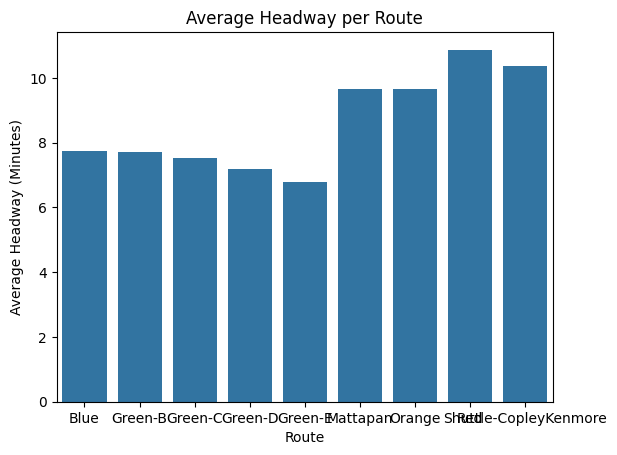

In [111]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).mean())
plt.title('Average Headway per Route')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Route')

Text(0.5, 0, 'Route')

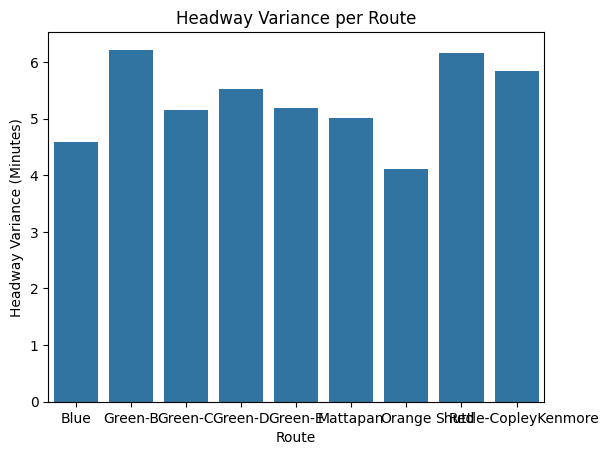

In [112]:
sns.barplot(stop_times_RT['headway_mins'].groupby(stop_times_RT['route_id']).std())
plt.title('Headway Variance per Route')
plt.ylabel('Headway Variance (Minutes)')
plt.xlabel('Route')

In [113]:
avg_station_headway = stop_times_RT.groupby(stop_times_RT['stop_id'])[['headway_mins', 'direction_id']].agg(['mean','min', 'max', 'std']).reset_index()
avg_station_headway.columns = ['_'.join(col).strip('_') for col in avg_station_headway.columns.values]
avg_station_headway['direction_id'] = avg_station_headway['direction_id_max'].astype(int).astype(str)

avg_station_headway.drop(['direction_id_max', 'direction_id_mean', 'direction_id_min', 'direction_id_std'], axis = 1, inplace = True)
avg_station_headway_named = avg_station_headway.merge(stops[['stop_id','stop_name', 'stop_lat', 'stop_lon']], on = 'stop_id', how = 'left')
avg_station_headway_named['name_direction'] = avg_station_headway_named['stop_name'] + ' ' + avg_station_headway_named['direction_id']
avg_station_headway_named['direction'] = avg_station_headway_named['direction_id'].apply(lambda x: 'Inbound' if x=='1' else 'Outbound')
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,170136,9.735561,0.016667,462.083333,7.033879,1,Babcock Street,42.351538,-71.119553,Babcock Street 1,Inbound
1,170137,9.504931,0.016667,343.883333,6.599959,0,Babcock Street,42.351695,-71.120257,Babcock Street 0,Outbound
2,170140,9.721476,0.016667,511.200000,7.592549,1,Amory Street,42.350901,-71.114318,Amory Street 1,Inbound
3,170141,9.531799,0.016667,500.400000,7.938518,0,Amory Street,42.351066,-71.115027,Amory Street 0,Outbound
4,70002,9.657094,1.200000,251.866667,5.066553,0,Green Street,42.309832,-71.108059,Green Street 0,Outbound


In [114]:
avg_station_headway_named.head()

,stop_id,headway_mins_mean,headway_mins_min,headway_mins_max,headway_mins_std,direction_id,stop_name,stop_lat,stop_lon,name_direction,direction
0,170136,9.735561,0.016667,462.083333,7.033879,1,Babcock Street,42.351538,-71.119553,Babcock Street 1,Inbound
1,170137,9.504931,0.016667,343.883333,6.599959,0,Babcock Street,42.351695,-71.120257,Babcock Street 0,Outbound
2,170140,9.721476,0.016667,511.200000,7.592549,1,Amory Street,42.350901,-71.114318,Amory Street 1,Inbound
3,170141,9.531799,0.016667,500.400000,7.938518,0,Amory Street,42.351066,-71.115027,Amory Street 0,Outbound
4,70002,9.657094,1.200000,251.866667,5.066553,0,Green Street,42.309832,-71.108059,Green Street 0,Outbound


Text(0.5, 0, 'Station')

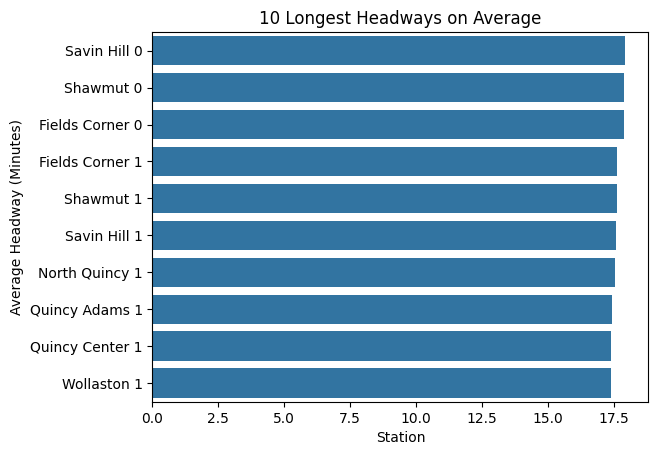

In [115]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_mean', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_mean')
plt.title('10 Longest Headways on Average')
plt.ylabel('Average Headway (Minutes)')
plt.xlabel('Station')

Text(0, 0.5, 'Station')

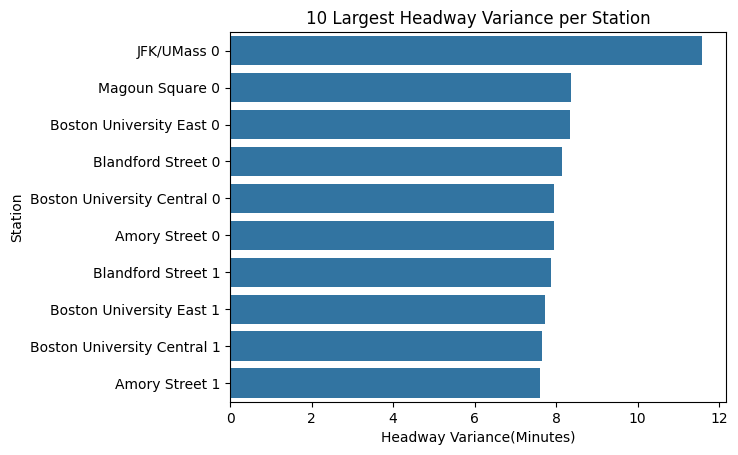

In [116]:
sns.barplot(data = avg_station_headway_named.sort_values(by = 'headway_mins_std', ascending = False)[:10], y = 'name_direction', x = 'headway_mins_std')
plt.title('10 Largest Headway Variance per Station')
plt.xlabel('Headway Variance(Minutes)')
plt.ylabel('Station')

Direction_ID: 1 = Inbound, 0 = Outbound

In [117]:
import plotly.express as px
from plotly.offline import plot
px.set_mapbox_access_token('pk.eyJ1Ijoia2VtdTEiLCJhIjoiY2x5YWYzeDZtMTNwdzJybXhsMnhiOHFlcCJ9.ZlVG4dJl_SlRlFhYPmQdsw')
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=10,
                        size = 'headway_mins_mean',

                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Average Headway per Station',
                        labels = {'headway_mins_mean':'Average Headway (Minutes)',
                                  'direction': 'Direction'
                                  }
                        )
fig.write_html('headway_mean_map.html')
fig.show()

In [118]:
fig = px.scatter_mapbox(avg_station_headway_named, lat="stop_lat", lon="stop_lon",
                        color="direction", zoom=10,
                        size = 'headway_mins_std',
                        #color_continuous_scale=px.colors.cyclical.Twilight,
                        #mapbox_style='open-street-map'
                        mapbox_style = 'basic',
                        title = 'Station Headway Variance',
                        labels = {'headway_mins_std':'Headway Variance (Minutes)',
                                  'direction': 'Direction'}
                        )
fig.write_html('headway_std_map.html')
fig.show()

****Variance in Journey Length****

In [151]:
journey_length = stop_times_RT.sort_values(by = ['service_date', 'stop_sequence','trip_id'], ascending=[True, True, True])
journey_length['prev_sec'] = journey_length.groupby(['trip_id', 'service_date'])['stop_departure_sec'].shift(1)
journey_length['prev_station'] = journey_length.groupby(['trip_id', 'service_date'])['stop_name'].shift(1)
journey_length['prev_stop_seq'] = journey_length.groupby(['trip_id', 'service_date'])['stop_sequence'].shift(1)
journey_length['is_consecutive'] = journey_length.apply(lambda x: True if pd.isna(x['prev_stop_seq']) else  (((x['stop_sequence'] - x['prev_stop_seq']) ==1) or(x['stop_sequence'] - x['prev_stop_seq']) ==10), axis = 1)
journey_length['journey_length'] = (journey_length['stop_departure_sec'] - journey_length['prev_sec']) / 60
journey_length['journey_name'] = journey_length['prev_station'] + ' to ' + journey_length['stop_name']
journey_length = journey_length[journey_length['is_consecutive'] == True] #Only Consecutive Stations Toggle
journey_length_chart = journey_length.groupby('journey_name')['journey_length'].agg(['mean', 'std', 'count']).reset_index()
journey_length_chart = journey_length_chart[journey_length_chart['count'] > 100]

Text(0, 0.5, 'Event (Minimum 100 Events)')

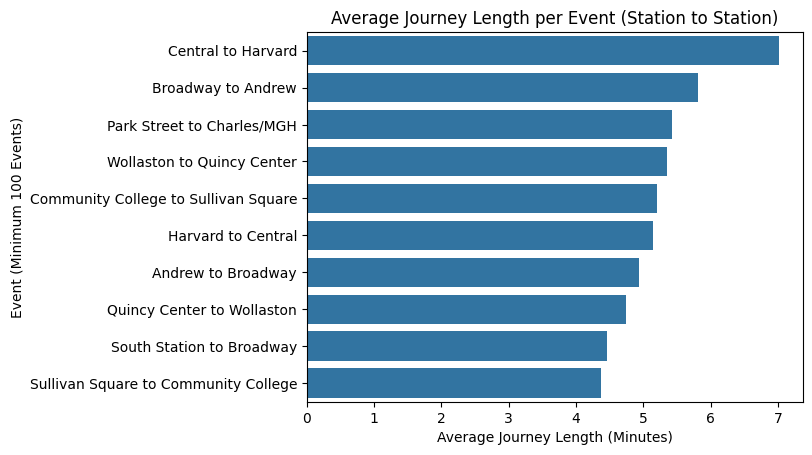

In [120]:
sns.barplot(data = journey_length_chart.sort_values(by = 'mean', ascending = False).head(10),y = 'journey_name', x = 'mean', orient = 'h')
plt.title('Average Journey Length per Event (Station to Station)')
plt.xlabel('Average Journey Length (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

Text(0, 0.5, 'Event (Minimum 100 Events)')

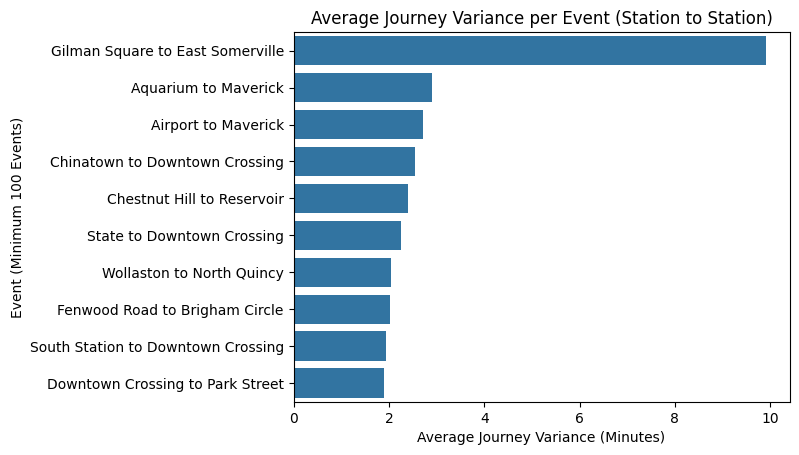

In [121]:
sns.barplot(data = journey_length_chart.sort_values(by = 'std', ascending = False).head(10),y = 'journey_name', x = 'std', orient = 'h')
plt.title('Average Journey Variance per Event (Station to Station)')
plt.xlabel('Average Journey Variance (Minutes)')
plt.ylabel('Event (Minimum 100 Events)')

In [122]:
journey_length[(journey_length['trip_id'] == '59736517') & (journey_length['service_date'] == '2024-01-03')]


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,prev_sec,prev_station,prev_stop_seq,is_consecutive,journey_length,journey_name
7340511,59736517,05:52:00,05:52:00,70040,10,NaN,0,0,0.0,gover,...,21134.0,283.0,1.0,4.716667,NaN,NaN,NaN,True,NaN,NaN
7340570,59736517,05:53:00,05:53:00,70042,20,NaN,0,0,0.0,state,...,21224.0,272.0,1.0,4.533333,21134.0,Government Center,10.0,True,1.500000,Government Center to State
7340629,59736517,05:55:00,05:55:00,70044,30,NaN,0,0,0.0,aqucl,...,21326.0,287.0,1.0,4.783333,21224.0,State,20.0,True,1.700000,State to Aquarium
7340688,59736517,05:58:00,05:58:00,70046,40,NaN,0,0,0.0,mvbcl,...,21495.0,282.0,1.0,4.700000,21326.0,Aquarium,30.0,True,2.816667,Aquarium to Maverick
7340747,59736517,06:01:00,06:01:00,70048,50,NaN,0,0,0.0,aport,...,21644.0,295.0,1.0,4.916667,21495.0,Maverick,40.0,True,2.483333,Maverick to Airport
7340866,59736517,06:09:00,06:09:00,70054,80,NaN,0,0,0.0,sdmnl,...,22120.0,373.0,1.0,6.216667,21986.0,Orient Heights,70.0,True,2.233333,Orient Heights to Suffolk Downs
7340925,59736517,06:11:00,06:11:00,70056,90,NaN,0,0,0.0,bmmnl,...,22201.0,370.0,1.0,6.166667,22120.0,Suffolk Downs,80.0,True,1.350000,Suffolk Downs to Beachmont
7340984,59736517,06:13:00,06:13:00,70058,100,NaN,0,0,0.0,rbmnl,...,22343.0,380.0,1.0,6.333333,22201.0,Beachmont,90.0,True,2.366667,Beachmont to Revere Beach


In [123]:
headways[(headways['trip_id'] == '59736517') & (headways['service_date'] == '2024-01-03')]

,service_date,route_id,trunk_route_id,branch_route_id,trip_id,direction_id,direction,parent_station,stop_id,stop_name,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,headway_branch_seconds
65236,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-gover,70040,Government Center,2024-01-03T05:52:14Z,21134,283.0,NaN
65570,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-state,70042,State,2024-01-03T05:53:44Z,21224,272.0,NaN
65904,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-aqucl,70044,Aquarium,2024-01-03T05:55:26Z,21326,287.0,NaN
66238,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-mvbcl,70046,Maverick,2024-01-03T05:58:15Z,21495,282.0,NaN
66572,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-aport,70048,Airport,2024-01-03T06:00:44Z,21644,295.0,NaN
67072,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-orhte,70052,Orient Heights,2024-01-03T06:06:26Z,21986,340.0,NaN
67400,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-sdmnl,70054,Suffolk Downs,2024-01-03T06:08:40Z,22120,373.0,NaN
67728,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-bmmnl,70056,Beachmont,2024-01-03T06:10:01Z,22201,370.0,NaN
68056,2024-01-03,Blue,Blue,NaN,59736517,1,East,place-rbmnl,70058,Revere Beach,2024-01-03T06:12:23Z,22343,380.0,NaN


**Gated Entries**

In [124]:
print(gated_entries.head())

  service_date time_period      stop_id station_name route_or_line  \
0   2024-05-31  (00:00:00)  place-alfcl      Alewife      Red Line   
1   2024-05-31  (00:00:00)  place-andrw       Andrew      Red Line   
2   2024-05-31  (00:00:00)  place-aport      Airport     Blue Line   
3   2024-05-31  (00:00:00)  place-aqucl     Aquarium     Blue Line   
4   2024-05-31  (00:00:00)  place-armnl    Arlington    Green Line   

   gated_entries  
0            3.0  
1            9.0  
2           56.0  
3           92.0  
4           41.0  


In [125]:
gated_entries['service_date'] = pd.to_datetime(gated_entries['service_date'])
gated_entries['hour'] = gated_entries['time_period'].str.extract(r'\((\d+):').astype(int)
gated_entries['date'] = gated_entries['service_date'].dt.date
print(gated_entries.isnull().sum())

service_date         0
time_period          0
stop_id          24443
station_name         0
route_or_line        0
gated_entries        0
hour                 0
date                 0
dtype: int64


In [126]:
gated_entries.dropna(inplace=True)
entries_per_hour = gated_entries.groupby(['station_name', 'hour']).size().reset_index(name='entries')
print(entries_per_hour.head())

  station_name  hour  entries
0      Airport     0      352
1      Airport     1      290
2      Airport     2       41
3      Airport     3       19
4      Airport     4      164


In [127]:
peak_hours = entries_per_hour.groupby('hour')['entries'].sum().reset_index()
high_traffic_stations = entries_per_hour.groupby('station_name')['entries'].sum().reset_index().sort_values(by='entries', ascending=False)

<ipython-input-128-015d481f2e0e>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




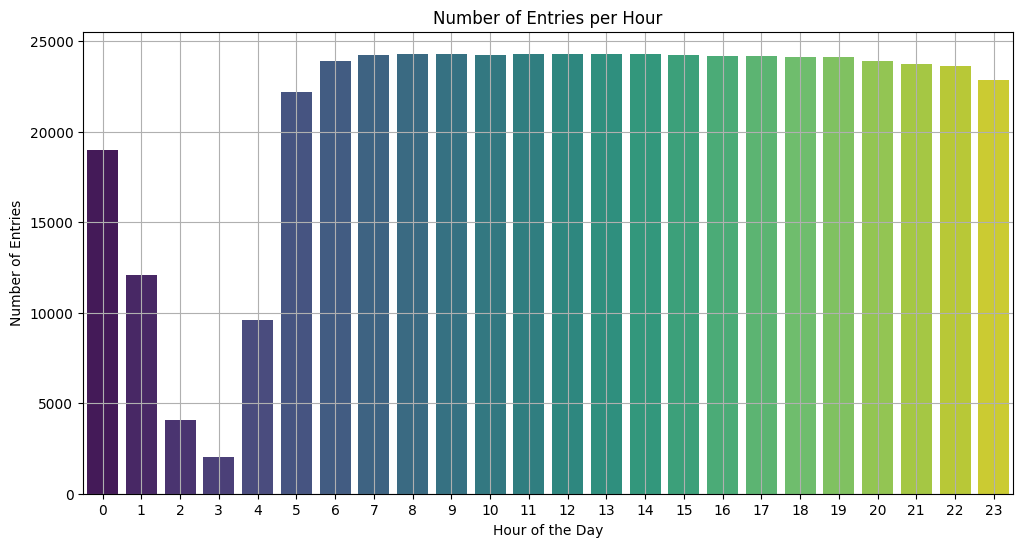

In [128]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='entries', data=peak_hours, palette='viridis')
plt.title('Number of Entries per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Entries')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

<ipython-input-129-e5f52d3fe76c>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




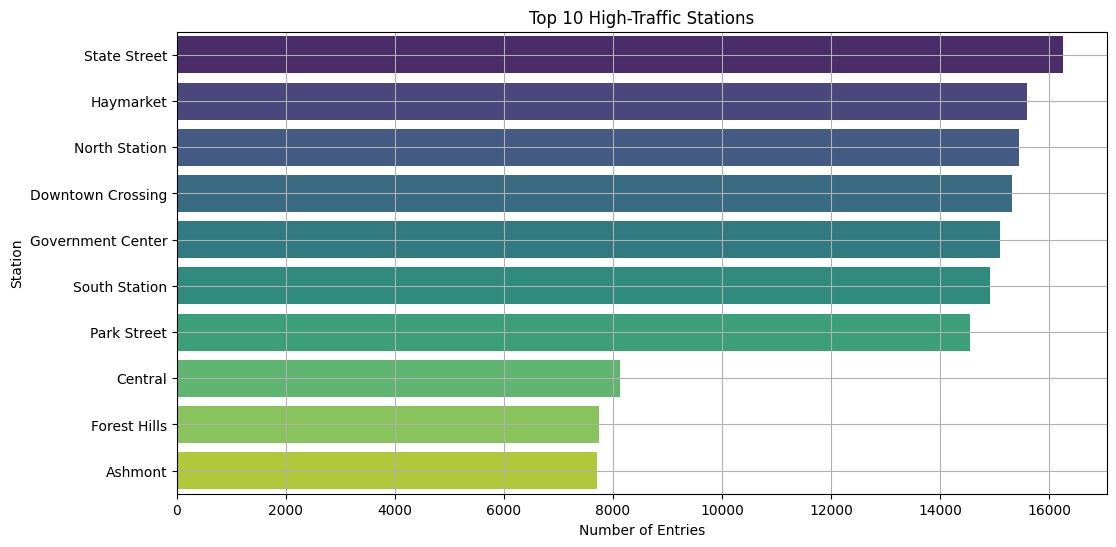

In [129]:
plt.figure(figsize=(12, 6))
sns.barplot(x='entries', y='station_name', data=high_traffic_stations.head(10), palette='viridis')
plt.title('Top 10 High-Traffic Stations')
plt.xlabel('Number of Entries')
plt.ylabel('Station')
plt.grid(True)
plt.show()

****Gated Entries & Headways Combined****

In [152]:
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['service_date'] = gated_entries['service_date'].astype(str)
gated_entries['date_round'] = gated_entries['service_date'].apply(lambda x: x.split(' ')[0])

In [153]:
stop_times_RT['service_date'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[0])
stop_times_RT['service_time'] = stop_times_RT['stop_departure_datetime'].apply(lambda x: x.split('T')[1].replace('Z',''))
stop_times_RT['service_time'] = pd.to_datetime(stop_times_RT['service_time'], format = "%H:%M:%S")
stop_times_RT['round_time'] = stop_times_RT['service_time'].apply(lambda x: (x-dt.timedelta(minutes=x.minute%15, seconds=x.second, microseconds=x.microsecond)).time())
stop_times_RT['time_period'] = ('(' + stop_times_RT['round_time'].astype(str) + ')')


In [154]:
gated_entries['date'] = gated_entries['service_date'].astype(str)
gated_entries['time_period'] = gated_entries['time_period'].astype(str)
stop_times_RT['time_period'] = stop_times_RT['time_period'].astype(str)
stop_times_RT['service_date'] = stop_times_RT['service_date'].astype(str)
headway_gated = stop_times_RT.merge(gated_entries[['date_round', 'time_period','station_name', 'gated_entries']], left_on = ['service_date', 'time_period', 'stop_name'],right_on =['date_round', 'time_period', 'station_name'],  how = 'inner')
headway_gated

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period,date_round,station_name,gated_entries
0,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,20449.0,684.0,1.0,11.400000,1900-01-01 05:40:49,05:30:00,(05:30:00),2024-05-04,Green Street,7.0
1,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,20381.0,623.0,1.0,10.383333,1900-01-01 05:39:41,05:30:00,(05:30:00),2024-05-11,Green Street,3.0
2,61187517,05:27:00,05:27:00,70003,10,NaN,0,0,0.0,grnst,...,20313.0,507.0,1.0,8.450000,1900-01-01 05:38:33,05:30:00,(05:30:00),2024-05-25,Green Street,5.0
3,61187517,05:29:00,05:29:00,70005,20,NaN,0,0,0.0,sbmnl,...,20588.0,661.0,1.0,11.016667,1900-01-01 05:43:08,05:30:00,(05:30:00),2024-05-04,Stony Brook,8.0
4,61187517,05:29:00,05:29:00,70005,20,NaN,0,0,0.0,sbmnl,...,20549.0,627.0,1.0,10.450000,1900-01-01 05:42:29,05:30:00,(05:30:00),2024-05-11,Stony Brook,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255091,60393747,25:03:00,25:03:00,70079,90,NaN,0,0,1.0,sstat,...,91221.0,1563.0,0.0,26.050000,1900-01-01 01:20:21,01:15:00,(01:15:00),2024-01-02,South Station,0.9
1255092,60393747,25:13:00,25:13:00,70085,130,NaN,0,0,1.0,jfk,...,92362.0,1663.0,0.0,27.716667,1900-01-01 01:39:22,01:30:00,(01:30:00),2024-01-02,JFK/UMass,1.0
1255093,60393747,25:22:00,25:22:00,70089,150,NaN,0,0,1.0,fldcr,...,92677.0,2874.0,0.0,47.900000,1900-01-01 01:44:37,01:30:00,(01:30:00),2024-01-02,Fields Corner,1.0
1255094,60393747,25:25:00,25:25:00,70091,160,NaN,0,0,1.0,smmnl,...,92792.0,2895.0,0.0,48.250000,1900-01-01 01:46:32,01:45:00,(01:45:00),2024-01-02,Shawmut,1.0


In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
headway_gated['eval_metric'] = scaler.fit_transform(headway_gated[['gated_entries']]) * scaler.fit_transform(headway_gated[['headway_mins']])

In [156]:
headway_gated = headway_gated[headway_gated['headway_mins'] < 100]

In [161]:
headway_gated[['trip_id','stop_id','date_round', 'round_time', 'stop_name','direction_id', 'route_id', 'headway_mins', 'gated_entries', 'eval_metric']].sort_values(by = 'eval_metric', ascending = False).head(15)

,trip_id,stop_id,date_round,round_time,stop_name,direction_id,route_id,headway_mins,gated_entries,eval_metric
420392,60965213,70026,2024-03-09,18:00:00,North Station,0.0,Orange,71.550000,832.92,0.045219
911693,60455599,70027,2024-04-03,22:00:00,North Station,1.0,Orange,31.516667,1402.50,0.033529
306125,62248914,70039,2024-04-10,17:00:00,Government Center,0.0,Blue,59.900000,702.90,0.031945
403959,61170797,70068,2024-05-26,23:00:00,Harvard,1.0,Red,12.183333,3449.00,0.031847
1243307,60746336-20:45-HarvardParkSuspend,70067,2024-02-06,16:00:00,Harvard,0.0,Red,88.033333,435.00,0.029058
405189,61170796,70067,2024-05-26,21:30:00,Harvard,0.0,Red,21.316667,1639.00,0.026495
1243329,60746338-20:45-HarvardParkSuspend,70067,2024-02-06,17:00:00,Harvard,0.0,Red,54.583333,584.00,0.024185
420391,60965213,70026,2024-03-09,18:00:00,North Station,0.0,Orange,71.550000,429.08,0.023294
62111,61319100,70067,2024-05-24,22:30:00,Harvard,0.0,Red,10.366667,2880.00,0.022622
401459,61170726,70067,2024-05-26,22:00:00,Harvard,0.0,Red,16.650000,1790.00,0.022596


In [136]:
headway_gated.groupby(headway_gated.columns.tolist(),as_index=False).size()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,direction_id,headway_mins,service_time,round_time,time_period,date_round,station_name,gated_entries,eval_metric,size


In [160]:
headway_gated[(headway_gated['trip_id'] == '60746332-20:45-HarvardParkSuspend') &(headway_gated['stop_id']=='70067')]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period,date_round,station_name,gated_entries,eval_metric


In [159]:
stop_times_RT[(stop_times_RT['trip_id'] == '60746332-20:45-HarvardParkSuspend') &(stop_times_RT['stop_id']=='70067')]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,route_id,service_date,stop_departure_datetime,stop_departure_sec,headway_trunk_seconds,direction_id,headway_mins,service_time,round_time,time_period
8142412,60746332-20:45-HarvardParkSuspend,14:31:00,14:31:00,70067,30,NaN,0,1,0.0,harsq,...,Red,2024-02-05,2024-02-05T14:52:18Z,53538.0,14144.0,0.0,235.733333,1900-01-01 14:52:18,14:45:00,(14:45:00)
8142413,60746332-20:45-HarvardParkSuspend,14:31:00,14:31:00,70067,30,NaN,0,1,0.0,harsq,...,Red,2024-02-06,2024-02-06T14:40:08Z,52808.0,13662.0,0.0,227.700000,1900-01-01 14:40:08,14:30:00,(14:30:00)


In [158]:
stop_times[(stop_times['trip_id'] == '60746332-20:45-HarvardParkSuspend') &(stop_times['stop_id']=='70067')]

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,timepoint,checkpoint_id,...,location_type,parent_station,wheelchair_boarding,municipality,on_street,at_street,vehicle_type,route_desc,route_type,route_id
5349030,60746332-20:45-HarvardParkSuspend,14:31:00,14:31:00,70067,30,NaN,0,1,0.0,harsq,...,0.0,place-harsq,1.0,Cambridge,NaN,NaN,1.0,Rapid Transit,1.0,Red
